In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
import tensorflow.keras as keras

In [0]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
housing = fetch_california_housing()

In [0]:
X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target)

In [0]:
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full)

In [0]:
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

#### Model Building
- It connects all or part of the inputs directly to the output layers.
- This architecture makes it possible for neural network to learn both deep patterns and simple rules.

In [0]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden_1 = keras.layers.Dense(30,activation="relu")(input_)
hidden_2 = keras.layers.Dense(30,activation="relu")(hidden_1)
concat = keras.layers.Concatenate()([input_,hidden_2])
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_],outputs=[output])

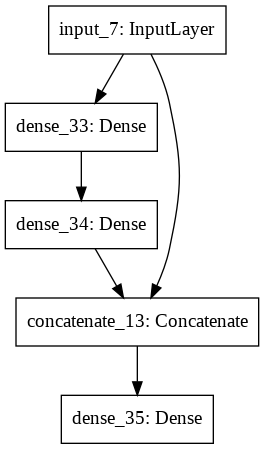

In [83]:
keras.utils.plot_model(model)

#### Model Compile

In [0]:
model.compile(
    loss="mean_squared_error",
    optimizer = keras.optimizers.SGD(learning_rate=0.0001)
)

#### Model Train

In [85]:
history = model.fit(X_train,y_train,epochs=50,validation_data=(X_valid,y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/50
11610/11610 [==============================] - 1s 94us/sample - loss: 5.5382 - val_loss: 4.8434
Epoch 2/50
11610/11610 [==============================] - 1s 66us/sample - loss: 4.3429 - val_loss: 3.7663
Epoch 3/50
11610/11610 [==============================] - 1s 63us/sample - loss: 3.3823 - val_loss: 2.9174
Epoch 4/50
11610/11610 [==============================] - 1s 64us/sample - loss: 2.6345 - val_loss: 2.2704
Epoch 5/50
11610/11610 [==============================] - 1s 67us/sample - loss: 2.0654 - val_loss: 1.7908
Epoch 6/50
11610/11610 [==============================] - 1s 61us/sample - loss: 1.6509 - val_loss: 1.4500
Epoch 7/50
11610/11610 [==============================] - 1s 65us/sample - loss: 1.3554 - val_loss: 1.2132
Epoch 8/50
11610/11610 [==============================] - 1s 59us/sample - loss: 1.1496 - val_loss: 1.0501
Epoch 9/50
11610/11610 [==============================] - 1s 59us/sample - loss: 1.0072 - val_l

In [86]:
model.evaluate(X_test,y_test)

5160/5160 [==============================] - 0s 33us/sample - loss: 0.5590


0.5590036213860031

#### Variant 2

In [0]:
input_A = keras.layers.Input(shape=[5],name="wide_input")
input_B = keras.layers.Input(shape=[6],name="Deep_input")
hidden_1 = keras.layers.Dense(30,activation="relu")(input_B)
hidden_2 = keras.layers.Dense(30,activation="relu")(hidden_1)
concat = keras.layers.concatenate([input_A,hidden_2])
output = keras.layers.Dense(1,name='output')(concat)

model = keras.Model(inputs=[input_A,input_B],outputs=[output])

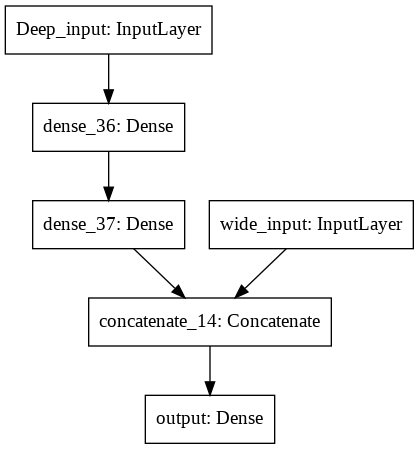

In [88]:
keras.utils.plot_model(model)

In [0]:
model.compile(
    loss="mean_squared_error",
    optimizer = keras.optimizers.SGD(learning_rate=0.0001)
)

In [0]:
X_train_A,X_train_B = X_train[:,:5], X_train[:,2:]
X_valid_A,X_valid_B = X_valid[:,:5], X_valid[:,2:]
X_test_A,X_test_B = X_test[:,:5], X_test[:,2:]

In [91]:
history = model.fit({"wide_input":X_train_A,"Deep_input":X_train_B},y_train,epochs=50,validation_data=({"wide_input":X_valid_A,"Deep_input":X_valid_B},y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/50
11610/11610 [==============================] - 1s 96us/sample - loss: 3.9454 - val_loss: 3.3251
Epoch 2/50
11610/11610 [==============================] - 1s 77us/sample - loss: 2.9765 - val_loss: 2.5087
Epoch 3/50
11610/11610 [==============================] - 1s 69us/sample - loss: 2.2792 - val_loss: 1.9289
Epoch 4/50
11610/11610 [==============================] - 1s 71us/sample - loss: 1.7965 - val_loss: 1.5420
Epoch 5/50
11610/11610 [==============================] - 1s 72us/sample - loss: 1.4711 - val_loss: 1.2928
Epoch 6/50
11610/11610 [==============================] - 1s 73us/sample - loss: 1.2553 - val_loss: 1.1316
Epoch 7/50
11610/11610 [==============================] - 1s 72us/sample - loss: 1.1092 - val_loss: 1.0209
Epoch 8/50
11610/11610 [==============================] - 1s 70us/sample - loss: 1.0073 - val_loss: 0.9444
Epoch 9/50
11610/11610 [==============================] - 1s 68us/sample - loss: 0.9328 - val_l

In [92]:
model.evaluate({"wide_input":X_test_A,"Deep_input":X_test_B},y_test)

5160/5160 [==============================] - 0s 34us/sample - loss: 0.5732


0.5732120527777561

#### Variant3-Multi Output

In [0]:
input_A = keras.layers.Input(shape=[5],name="wide_input")
input_B = keras.layers.Input(shape=[6],name="Deep_input")
hidden_1 = keras.layers.Dense(30,activation="relu")(input_B)
hidden_2 = keras.layers.Dense(30,activation="relu")(hidden_1)
concat = keras.layers.concatenate([input_A,hidden_2])
output = keras.layers.Dense(1,name='output')(concat)
aux_output = keras.layers.Dense(1,name='aux_output')(hidden_2)

model = keras.Model(inputs=[input_A,input_B],outputs=[output,aux_output])

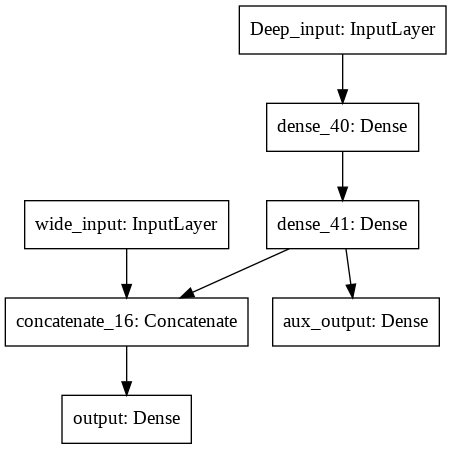

In [95]:
keras.utils.plot_model(model)

#### Model Complie

In [0]:
model.compile(
    loss= ['mse','mse'],
    loss_weights = [0.9,0.1],
    optimizer =keras.optimizers.SGD(learning_rate=0.0001)
)

### Model Training

In [97]:
history = model.fit(
    {"wide_input":X_train_A,"Deep_input":X_train_B},
    {"output":y_train,"aux_output":y_train},
    epochs=50,
    validation_data=({"wide_input":X_valid_A,"Deep_input":X_valid_B},{"output":y_valid,"aux_output":y_valid},)
    )

Train on 11610 samples, validate on 3870 samples
Epoch 1/50
11610/11610 [==============================] - 1s 123us/sample - loss: 4.8194 - output_loss: 4.6998 - aux_output_loss: 5.8906 - val_loss: 4.2881 - val_output_loss: 4.0945 - val_aux_output_loss: 6.0332
Epoch 2/50
11610/11610 [==============================] - 1s 75us/sample - loss: 3.8157 - output_loss: 3.5814 - aux_output_loss: 5.9254 - val_loss: 3.4455 - val_output_loss: 3.1562 - val_aux_output_loss: 6.0509
Epoch 3/50
11610/11610 [==============================] - 1s 74us/sample - loss: 3.0762 - output_loss: 2.7601 - aux_output_loss: 5.9181 - val_loss: 2.8045 - val_output_loss: 2.4470 - val_aux_output_loss: 6.0244
Epoch 4/50
11610/11610 [==============================] - 1s 81us/sample - loss: 2.5194 - output_loss: 2.1467 - aux_output_loss: 5.8710 - val_loss: 2.3242 - val_output_loss: 1.9213 - val_aux_output_loss: 5.9521
Epoch 5/50
11610/11610 [==============================] - 1s 76us/sample - loss: 2.1092 - output_loss: 1.7

### Model Evaluate

In [99]:
model.evaluate({"wide_input":X_test_A,"Deep_input":X_test_B},{"output":y_test,"aux_output":y_test})

5160/5160 [==============================] - 0s 42us/sample - loss: 0.7319 - output_loss: 0.5757 - aux_output_loss: 2.1458


[0.7319268603657567, 0.5757162, 2.1458437]